## Project1:

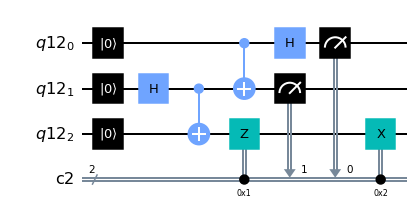

In [21]:
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
qc.reset(range(3))
qc.h(1)
qc.cx([1,0],[2,1])
qc.h(0)
qc.measure([0,1], [0,1])
qc.z(2).c_if(cr, 1)
qc.x(2).c_if(cr, 2)
qc.draw('mpl')

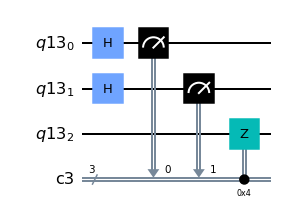

In [22]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)
qc.h(range(2))
qc.measure(0, 0)
qc.measure(1, 1)
qc.z(2).c_if(cr, 4)
qc.draw('mpl')

Reason:Can’t be conditional on measurement.And cannot be displayed before measurement.

## Project2:quantum teleportation protocol

https://stackoverflow.com/questions/60918011/implement-quantum-teleportation-in-qiskit

In [2]:
from qiskit import *

qc = QuantumCircuit(3, 3)

qc.x(0) #q -> 1
qc.barrier()

qc.h(1)
qc.cx(1, 2)
qc.barrier()
# Next, apply the teleportation protocol.
qc.cx(0, 1)
qc.h(0)
qc.barrier()
# We measure these qubits and use the classical results to perform an operation
qc.measure(0, 0)
qc.measure(1, 1)
qc.cx(1, 2)
qc.cz(0, 2)
#qc.barrier()
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1, memory=True).result()
result = job.get_memory()[0]
qc.measure(2, 2)
print(job.get_memory()[0]) #q = 0
qc.draw()

001


┌───┐ ░            ░      ┌───┐ ░ ┌─┐              
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├─────────■────
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐      │    
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──■───┼────
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├─░────────────░──╫──╫─┤ X ├─■─┤M├
           ░      └───┘ ░            ░  ║  ║ └───┘   └╥┘
c: 3/═══════════════════════════════════╩══╩══════════╩═
                                        0  1          2

The user can't get q_3 rightly.It's because he use the qubits entangled after measurement